## Imports

In [154]:
label = 'Archive Name'
name = 'Buzsaki'
a = [i for i, j in enumerate(data['Y'][label]) if j == name]
a

[37023, 37024, 37025, 37026, 37027]

In [147]:
n = McNeuron.Neuron(input_file=data['X'][a[4]],input_format='Matrix of swc')

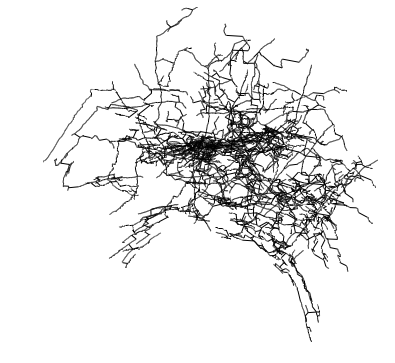

123248


In [148]:
McNeuron.visualize.plot_2D(n)
print n.n_node

In [144]:
McNeuron.visualize.plot_dendrogram(n)

KeyboardInterrupt: 

In [136]:
n.fit()
n.features['Nnodes']

KeyboardInterrupt: 

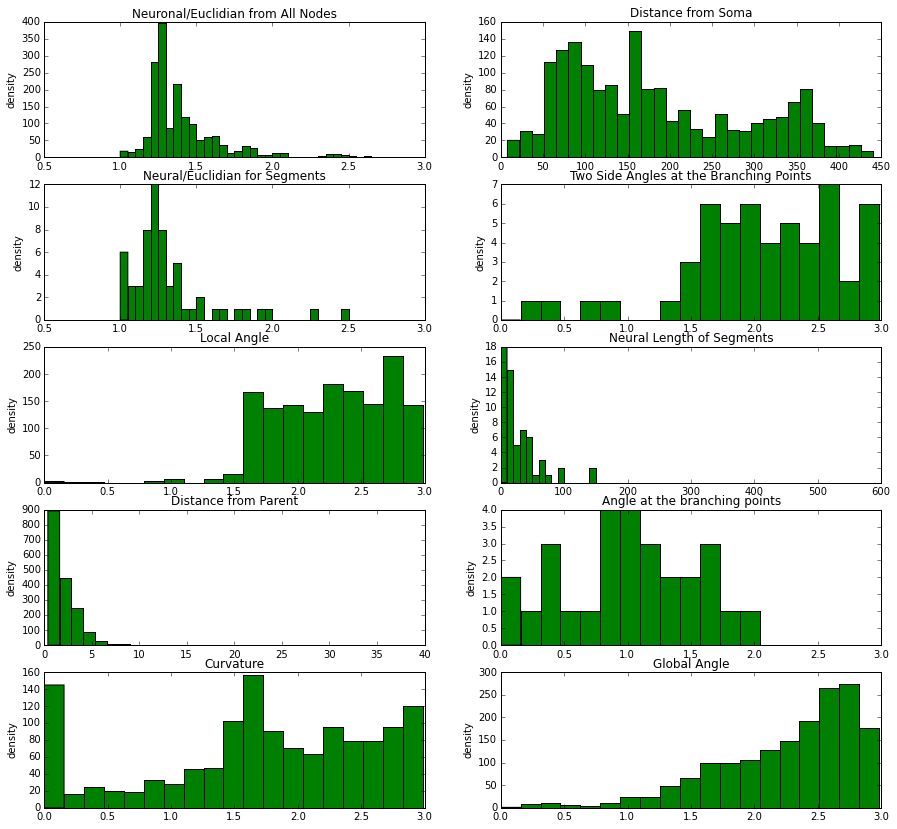

In [127]:
n.show_features()

In [153]:
for name in data['Y'].keys():
    print name
    print data['Y'][name][a[0]]

Date of Upload
2011-11-08
Total Length
43281.8 &#956;m
Number of Bifurcations
375
Details about selected neur
[]
Morphological Attributes
No Diameter, 3D, Angles
Primary Brain Region
entorhinal cortex
Slice Thickness
 &#956;m
Magnification
100x
Average Bifurcation Angle Local
118.43&deg;
Fractal Dimension
1.02
Primary Cell Class
principal cell
Number of Stems
10
Number of Branches
760
Tertiary Cell Class
Not reported
Development
not reported
Total Surface
46550.6 &#956;m2
Description on swc file
# Original file Culture-355-6.swc edited using StdSwc version 1.31 on 2/24/15.
# Irregularities and fixes documented in Culture-355-6.swc.std.  See StdSwc1.31.doc for more information.
#
# Neurolucida to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu
# Original fileName:C:\Users\praveen\Desktop\DataProcessing\CurrentArchives\Processing\Hamad\Original\Together\Stephanie\ASC 2\Culture-355-6.asc
#The original file has a single soma contour that is averaged into 3 soma points
1


In [ ]:
morph = []
geo = []
for i in range(10000):
    neuron = McNeuron.Neuron(input_file=mat['neuron_data'][i,3],
                               input_format="Matrix of swc")
    n = McNeuron.subsample.regular_subsample(neuron)
    #ratio = np.max(np.abs(n.location))
    print i
    morph.append(n.parent_index)
    geo.append(n.location)

In [ ]:
n.location[:,0]

In [ ]:
labels

## plot Sample

In [ ]:
#loc = "/Volumes/Arch/Dropbox/HG-GAN/03-Data/Matlab format/sample.mat"
loc = "/Volumes/Arch/Dropbox/HG-GAN/03-Data/Matlab format/part 1.mat"
mat = scipy.io.loadmat(loc)
subsample_number = 40
for i in range(19,20):
    #tmp = mat['neuron_data'][i][3]
    tmp = mat['N']
    print(60*"-")
    neuron = McNeuron.Neuron(input_file=mat['N'],
                           input_format="Matrix of swc")
    print("Real Neuron with "+ str(neuron.n_node)+" nodes")
    McNeuron.visualize.plot_2D(neuron)
    plt.show()
    n = McNeuron.subsample.regular_subsample(neuron)
    
    print(60*"-")
    print("Mesoscale Neuron with " + str(n.n_node)+" nodes")
    McNeuron.visualize.plot_2D(n)
    plt.show()
    n = McNeuron.subsample.straight_prune_subsample(neuron, 
                                                    subsample_number)
    n, dis = McNeuron.subsample.straight_subsample_with_fixed_number(neuron,
                                                                     100)
    print(60*"-")
    print("Straigthen-Prune Neuron with " + str(n.n_node)+" nodes")
    McNeuron.visualize.plot_2D(n)
    plt.show()
    
    print(60*"-")
    n = McNeuron.subsample.random_subsample(neuron, 40)
    print("Random subsample with " + str(n.n_node)+" nodes")
    McNeuron.visualize.plot_2D(n)
    plt.show()
    
    print(60*"-")
    n = McNeuron.subsample.straigh_subsample(neuron, 20)
    print("Stright subsample; distance = 20(#nodes = " +  str(n.n_node)+")")
    McNeuron.visualize.plot_2D(n)
    plt.show()
    
    print(60*"-")
    n = McNeuron.subsample.straight_prune_subsample(neuron, 40)
    print("Stright prune subsample; #nodes = " +  str(n.n_node))
    McNeuron.visualize.plot_2D(n)
    plt.show()

In [ ]:
tmp = mat['neuron_data'][15][3]
neuron = McNeuron.Neuron(input_file=tmp,
                       input_format="Matrix of swc")
McNeuron.visualize.plot_2D(neuron)
plt.show()

In [ ]:
np.max(np.abs(np.random.rand(3,5)))

## Evolution of Stright-prune subsample

In [ ]:
for i in range(250, 20, -10):    
    print(60*"-")
    n = McNeuron.subsample.straight_prune_subsample(neuron, i)
    print("Stright prune subsample; #nodes = " +  str(n.n_node))
    McNeuron.visualize.plot_2D(n)
    plt.show()

In [ ]:
def rescale_neuron_in_unit_box(neuron):
    swc = np.zeros([neuron.n_node, 7])
    swc[:, 1] = neuron.diameter
    ratio = np.max(np.abs(neuron.location))
    swc[:, 2] = rescale_location(neuron.location[0, :])
    swc[:, 3] = rescale_location(neuron.location[1, :])
    swc[:, 4] = rescale_location(neuron.location[2, :])
    swc[:, 5] = neuron.diameter
    swc[:, 6] = neuron.parent_index + 1
    swc[0, 6] = -1
    return swc
    
def rescale_location(loc, ratio):
    loc = loc/ratio
    loc = loc - loc[0]
    return loc

def cut_from_end_nodes(neuron, number):
    current_swc = rescale_neuron_in_unit_box(neuron)
    current_neuron = McNeuron.Neuron(input_file=current_swc,
                                     input_format="Matrix of swc")
#     current_neuron = \
#         McNeuron.subsample.straigh_subsample(current_neuron,
#                                              distance= .1)
    current_swc = McNeuron.neuron_util.get_swc_matrix(current_neuron)
    for i in range(current_neuron.n_node - number):
        row = np.random.choice(np.where(current_neuron.branch_order == 0)[0])
        current_swc = np.delete(current_swc, row, axis=0)
        higher_index = np.where(current_swc[:,6]>row)[0]
        current_swc[higher_index, 6] = current_swc[higher_index, 6] - 1
        current_neuron = McNeuron.Neuron(input_file=current_swc, 
                                         input_format="Matrix of swc")
    current_swc = rescale_neuron_in_unit_box(current_neuron)
    current_neuron = McNeuron.Neuron(input_file=current_swc,
                                     input_format="Matrix of swc")
    return current_neuron
    

In [ ]:
for i in range(250, 20, -10):    
    print(60*"-")
    n = cut_from_end_nodes(neuron, i)
    print("Stright prune subsample; #nodes = " +  str(n.n_node))
    McNeuron.visualize.plot_2D(n)
    plt.show()

In [ ]:
neurons = []
for i in range(100):
    tmp = mat['neuron_data'][i][3]
    neuron = McNeuron.Neuron(input_file=tmp,
                             input_format="Matrix of swc")
    n = cut_from_end_nodes(neuron, 40)
    print i
    neurons.append(n)

In [ ]:
McNeuron.visualize.plot_2D(neurons[34])

In [ ]:
np.random.choice(np.where(m.branch_order == 0)[0])

In [ ]:
np.where(m.branch_order == 0)[0]

In [ ]:
a = cut_from_end_nodes(neuron, 10)
print a.shape
np.delete(a, 3, axis = 0).shape

In [ ]:
v = McNeuron.subsample.straigh_subsample(m, distance= .1)
McNeuron.visualize.plot_2D(v)
v.n_node

In [ ]:
parent_matrix = np.zeros([n.n_node, n.n_node])
parent_matrix[range(1, n.n_node), n.parent_index[1:]] = 1
#full = LA.inv(np.eye(40) - full)
#plt.imshow(full)

dis_par = np.dot(np.eye(n.n_node) - parent_matrix, n.location.T)
plt.plot(np.sqrt(np.sum(dis_par**2,axis=1)))

In [ ]:
full = LA.inv(np.eye(n.n_node) - parent_matrix)
plt.imshow(full, cmap='Greys', interpolation='none')

In [ ]:
plt.plot(n.location[:1,:].T)

In [ ]:
plt.plot(dis_par[:,:1])

In [ ]:
for i in range(200,10,-10):
    #tmp = mat['N']
    neuron = data_transforms.swc_to_neuron(tmp)
    dis, n = subsample.straight_subsample_with_fixed_number(neuron,200)
    n = prune(n,i)
    McNeuron.visualize.plot_2D(n ,size = 4)

In [ ]:
tmp = mat['N']
neuron = data_transforms.swc_to_neuron(tmp)
McNeuron.visualize.plot_2D(neuron ,size = 4)
shortest_tips(neuron)
remove_node(neuron, 223)
McNeuron.visualize.plot_2D(neuron ,size = 4)

In [ ]:
np.arange()

In [ ]:
McNeuron.visualize.plot_2D(neuron ,size = 4)

In [ ]:
tmp = mat['neuron_data'][186][3]
#tmp = mat['N']
neuron = data_transforms.swc_to_neuron(tmp)
neuron2 = data_transforms.downsample_neuron(neuron, number = 20)
McNeuron.visualize.plot_2D(neuron2 ,size = 4)

In [ ]:
import subsample
tmp = mat['neuron_data'][168][3]
#tmp = mat['N']
print tmp.shape
neuron = subsample.extract_main_neuron_from_swc(tmp)
neuron2 = subsample.mesoscale_subsample(neuron, number = 40)
neuron.n_node
#neuron = extract_main_neuron_from_swc(tmp)
McNeuron.visualize.plot_2D(neuron ,size = 4)

In [ ]:
def select_unifrom_index(long_parent_id, n_selection = 300):
    length = len(long_parent_id)
    a, b = np.unique(long_parent_id,return_counts=True)
    (I,) = np.where(b==2)
    branch_point = a[I]
    end_point = np.setxor1d(np.arange(0, length), long_parent_id[4:])
    I = np.union1d(branch_point, end_point)
    print I.shape
    print length/(n_selection- len(I) - 2)
    intermediates = np.arange(0,length, int(length/(n_selection- len(I) - 1)))
    print intermediates.shape
    I = np.union1d(I, intermediates)
    random_point = np.setxor1d(np.arange(3,length), I)
    I = np.append(I, random_point[-(n_selection - len(I)):-1])
    I = np.sort(I)
    I = np.array(I,dtype=int)
    I[0] = 0
    return I

In [ ]:
long_parent_id = tmp[:,6]
#print long_parent_id[4:]
select_unifrom_index(long_parent_id).shape

In [ ]:
neuron.n_node

In [ ]:
import subsample
L = []
big = []
er = []
ireg = []
for i in range(165,180):
    try:
        tmp = mat['neuron_data'][i][3]
        #tmp = mat['N']
        neuron = subsample.extract_main_neuron_from_swc(tmp)
        neuron2 = subsample.mesoscale_subsample(neuron, number = 40)
        #if(np.mod(i,50)==0):
        print i
        if(neuron2.n_node == 40):
            L.append(neuron2)
        else:
            print("irregularity in number")
            ireg.append(i)
    except:
        print("error")
        er.append(i)

In [ ]:
data_transforms.encode_prufer(L[0].parent_index.tolist())
L[0].parent_index

In [ ]:
n = L[1]
n = McNeuron.Neuron(file_format = 'only list of nodes', input_file = n.nodes_list)
n.fit()
n.features

In [ ]:
neuron_database = L
subsampling_numbers = 40
l = len(neuron_database)
morph = np.zeros([l, subsampling_numbers - 2])
geo = np.zeros([l, subsampling_numbers - 1, 3])
data = dict()
for i in range(l):
    sub_neuron = L[i]
    par = sub_neuron.parent_index
    par[0] = -1
    morph[i, :] = data_transforms.encode_prufer(par.tolist())
    geo[i, :, :] = sub_neuron.location[:, 1:].T

data['morphology'] = dict()
data['morphology']['n'+str(subsampling_numbers)] = morph
data['geometry'] = dict()
data['geometry']['n'+str(subsampling_numbers)] = geo

In [ ]:
geo.shape

In [ ]:
import pickle
pickle.dump(data, open( "train4.p", "wb" ))

In [ ]:
morph.shape

In [ ]:
McNeuron.visualize.plot_2D(L[4280] ,size = 4)

In [ ]:
n = neuron.mesoscale_subsample(150)
#n = neuron.subsample_main_nodes()
McNeuron.visualize.plot_2D(n ,size = 4)
print n.n_node